# Passo 1. Configuração do projeto

In [59]:
# standard library packages
import joblib
import os
import urllib

# third-party library packages
import matplotlib
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

print('Matplotlib version : {}'.format(matplotlib.__version__))
print('Numpy version      : {}'.format(np.__version__))
print('Pandas version     : {}'.format(pd.__version__))
print('Sklearn version    : {}'.format(sklearn.__version__))
print('Seaborn version    : {}'.format(sns.__version__))

DATA_PATH = os.path.join('..', 'data', 'raw')
DATA_FILE = 'diabetes.csv'
DIABETES_DATA = os.path.join(DATA_PATH, DATA_FILE)

DEPLOY_PATH = os.path.join('..','model')
DEPLOY_FILE = 'finalized_model.sav'

RANDOM_STATE = 42 

print('Configuração completa')

Matplotlib version : 3.3.3
Numpy version      : 1.18.5
Pandas version     : 1.1.5
Sklearn version    : 0.23.2
Seaborn version    : 0.11.0
Configuração completa


# Passo 2. Carga dos dados

In [60]:
def load_data(data_path=DATA_PATH, data_file=DATA_FILE):
    csv_path = os.path.join(DATA_PATH, data_file)
    return pd.read_csv(csv_path)

In [61]:
diabetes_data = load_data(DATA_PATH, DATA_FILE)

# Passo 3. Análise Exploratória de Dados

## Descrição do dataset

In [62]:
print('Diabetes dataset has {} rows and {} columns'.format(diabetes_data.shape[0], diabetes_data.shape[1]))

Diabetes dataset has 768 rows and 9 columns


In [63]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


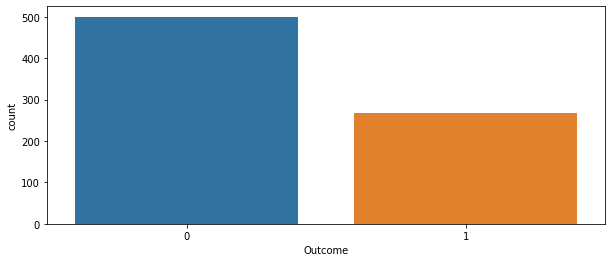

In [64]:
plt.figure(figsize=(10,4))
_ = sns.countplot(x='Outcome', data=diabetes_data)

## Verificando a existência de nulos (NA)

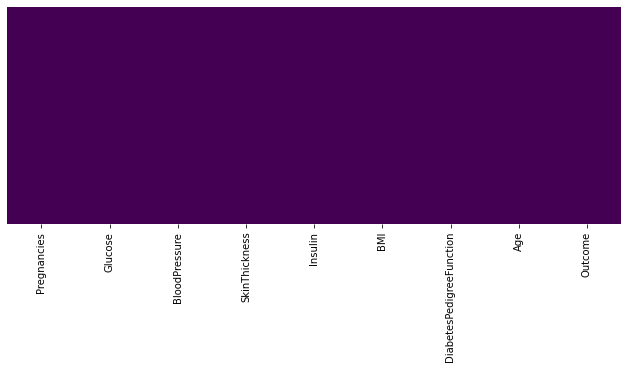

In [67]:
plt.figure(figsize=(11,4))
_ = sns.heatmap(diabetes_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Correlação e distribuição dos dados

In [46]:
X = diabetes_data.drop(['Outcome'], axis=1)
y = diabetes_data['Outcome']

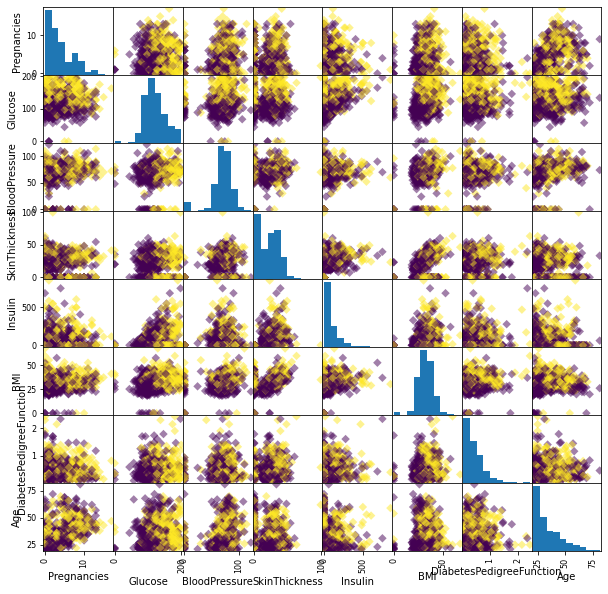

In [47]:
# documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
colors = y
_ = pd.plotting.scatter_matrix(X, c=colors, figsize=[10, 10], marker='D')

# Passo 5. Particionamento do dataset

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

# Passo 6. Treinamento do modelo

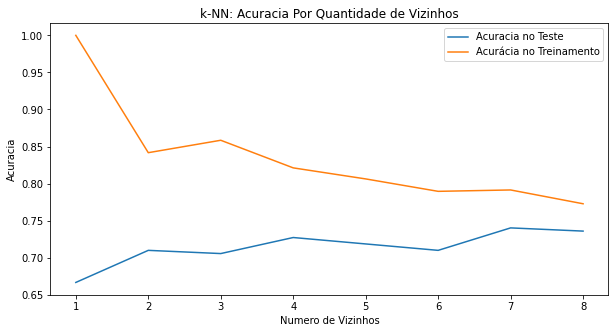

In [81]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy  = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i]  = knn.score(X_test, y_test)

plt.figure(figsize=(10,5))
plt.title('k-NN: Acuracia Por Quantidade de Vizinhos')
plt.plot(neighbors, test_accuracy, label = 'Acuracia no Teste')
plt.plot(neighbors, train_accuracy, label = 'Acurácia no Treinamento')
plt.legend()
plt.xlabel('Numero de Vizinhos')
plt.ylabel('Acuracia')
plt.show()


In [74]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

# Passo 7. Teste do modelo

In [75]:
y_pred = model.predict(X_test)
print("Predições em teste: \n {}".format(y_pred))

Predições em teste: 
 [0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 1 1 1 0]


# Passo 6. Medindo o desempenho

In [77]:
accuracy = model.score(X_test, y_test)
print("Acurácia do modelo: {}".format(accuracy))
print("Matriz de confusão")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Precision, recall e f1-score")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.7402597402597403
Matriz de confusão
[[129  21]
 [ 39  42]]
Precision, recall e f1-score
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



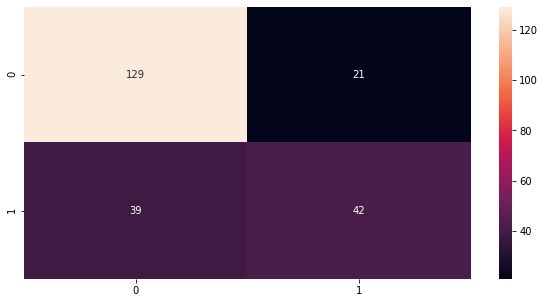

In [82]:
plt.figure(figsize=(10,5))
_= sns.heatmap(cm, annot=True, fmt='d')

# Passo 7. Implantação do modelo

In [83]:
filename = os.path.join(DEPLOY_PATH, DEPLOY_FILE)
joblib.dump(model, filename)

['../model/finalized_model.sav']